In [235]:
import numpy as np
from scipy import signal
import cmath
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq

from neurolib.models.aln import ALNModel

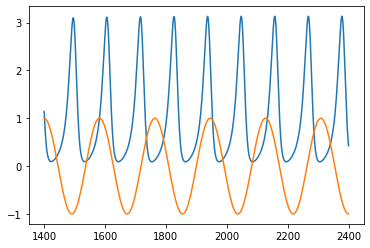

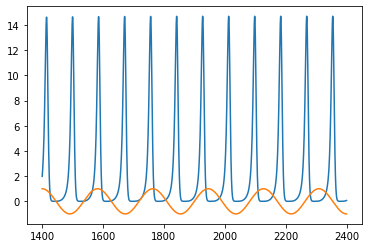

In [477]:
dur = 2400
dt = 0.1

time_ = np.arange(0,dur,dt)
amp = 0.01

aln = ALNModel()
aln.params.duration = dur
aln.params.dt = dt
aln.run()

dur = 1000
T = int(dur/dt)

t_osc = np.arange(0,dur,dt)
target_f = 0.0055
target = np.cos(2.*np.pi* target_f*t_osc)

aln_osc = []
for k in range(2):
    aln.params.mue_ext_mean = 0.16 + 0.1*k
    aln.params.mui_ext_mean = 0.1
    aln.run()
    plt.plot(aln.t[14000:], aln.rates_exc[0,14000:])
    plt.plot(t_osc+1400, target)
    plt.show()
    aln_osc.append(aln.rates_exc[0,14000:])

signal 0


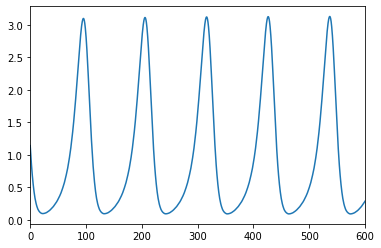

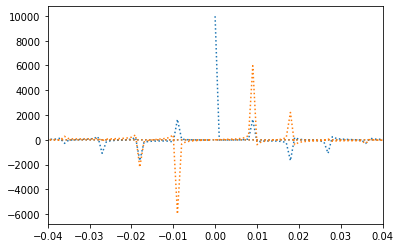

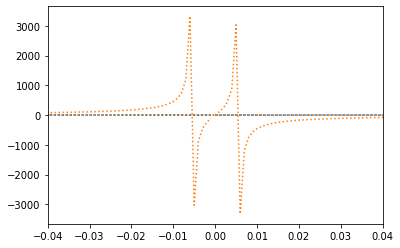

[0.46570254 0.46824196 0.47079085 0.47334907 0.47591652 0.47849296
 0.48107833 0.48367248 0.48627539 0.488887   0.4915073  0.49413626
 0.49677384 0.49941908 0.50207225 0.50473857 0.50741773 0.51010944
 0.51281348 0.51552963]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0.46570254 0.46824196 0.47079085 0.47334907 0.         0.47849296
 0.48107833 0.48367248 0.48627539 0.488887   0.4915073  0.49413626
 0.49677384 0.49941908 0.50207225 0.50473857 0.         0.51010944
 0.51281348 0.51552963]


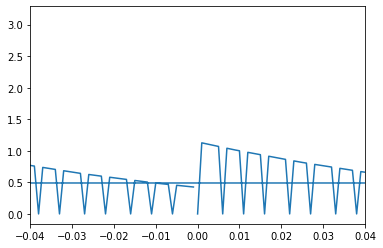

gradient


/home/lena/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


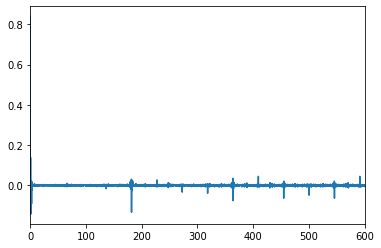

signal 0


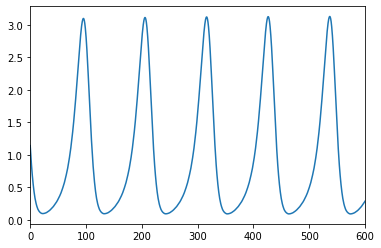

signal 1


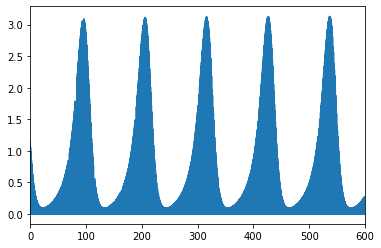

[0.         0.         0.         0.         0.47591652 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.50741773 0.
 0.         0.        ]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


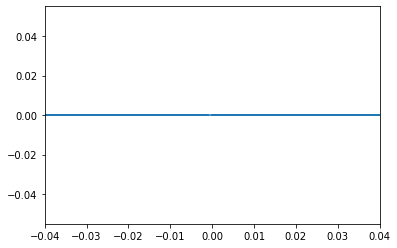

gradient


/home/lena/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


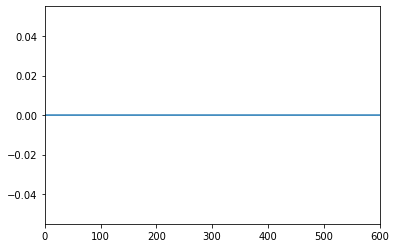

signal 0


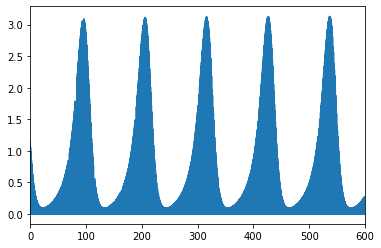

signal 1


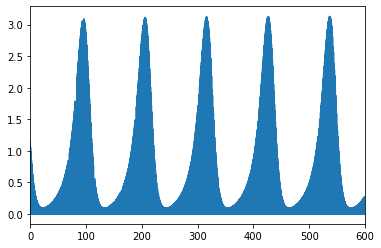

[0.         0.         0.         0.         0.47591652 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.50741773 0.
 0.         0.        ]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


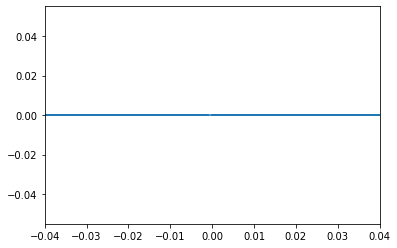

gradient


/home/lena/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


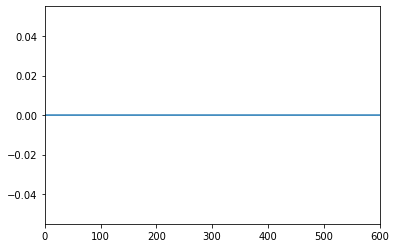

signal 0


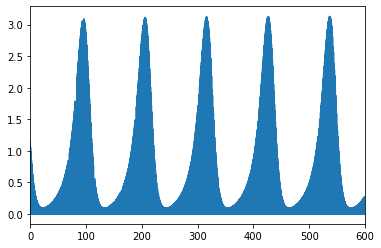

signal 1


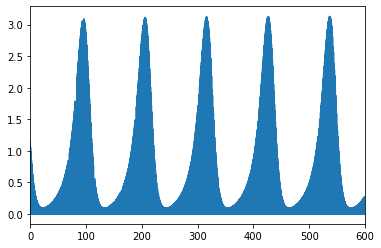

[0.         0.         0.         0.         0.47591652 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.50741773 0.
 0.         0.        ]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


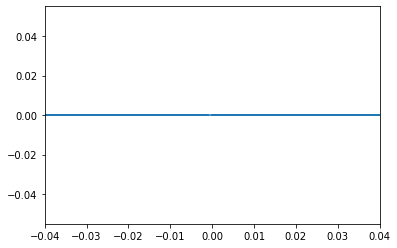

gradient


/home/lena/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


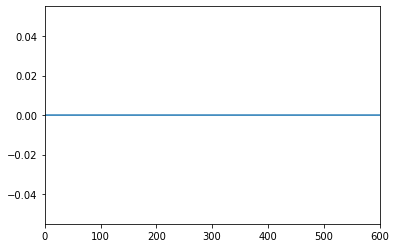

signal 0


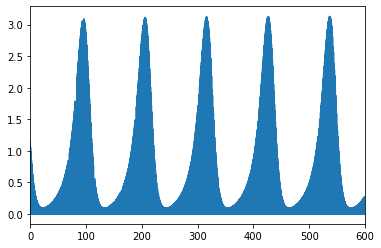

signal 1


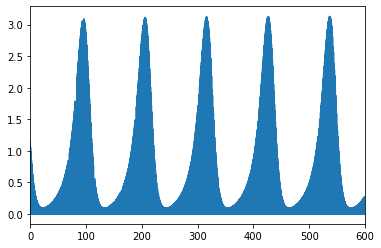

In [478]:
for sig in aln_osc:
    
    print("signal 0")
    plt.plot(t_osc, sig)
    plt.xlim(0, 600)
    plt.show()

    fft_1 = fft(sig)
    fft_2 = fft(target)
    freqs = fftfreq(T, dt)
    ind = np.where(fft_2 == np.amax(fft_2))
    plt.plot(freqs, fft_1.real, linestyle=':')
    plt.plot(freqs, fft_1.imag, linestyle=':')
    plt.xlim(-0.04, 0.04)
    plt.show()
    plt.plot(freqs, fft_2.real, linestyle=':')
    plt.plot(freqs, fft_2.imag, linestyle=':')
    plt.xlim(-0.04, 0.04)
    plt.show()
    
    sig_target = targetSpectrum(target_f, T, dt, dur)
    
    for k in range(4):
        grad = grad_domfreq(sig, target_f, T, dt, dur)
        print(sig[4990:5010])
        print(sig_target[4990:5010])
        print(grad[4990:5010])
        plt.plot(freqs, grad)
        plt.xlim(-0.04, 0.04)
        plt.show()

        print("gradient")
        grad_osc = fftpack.ifft(grad)
        plt.plot(t_osc, grad_osc)
        plt.xlim(0, 600)
        plt.show()
        
        print("signal 0")
        plt.plot(t_osc, sig)
        plt.xlim(0, 600)
        plt.show()
        
        sig -= grad
        
        print("signal 1")
        plt.plot(t_osc, sig)
        plt.xlim(0, 600)
        plt.show()
    
    """
    dom_spec = domFreqOsc(fft_1, 1)
    
    plt.plot(freqs, dom_spec.real)
    plt.plot(freqs, dom_spec.imag, linestyle=':')
    plt.xlim(-150,150)
    plt.show()
    
    x_back = fftpack.ifft(dom_spec)
    fig, ax = plt.subplots()
    ax.plot(t_osc, x_back)
    ax.set_xlabel('Time [s]')
    ax.set_ylabel('Signal amplitude');
    ax.set_xlim(0, 600)
    plt.show()
    """
    
    break


In [461]:
def targetSpectrum(f_target, T, dt, dur):
    target_spectrum = np.zeros((T))
    freqs = fftfreq(T, dt)
    m = 0.
    while m * f_target < np.amax(freqs):
        freq = round(m*f_target*dur,0)/dur 
        #print(m, freq)
        target_spectrum[np.where(freqs==freq)] = 1.
        target_spectrum[np.where(freqs==-freq)] = 1.
        m += 1
        
    return target_spectrum

def grad_domfreq(spectrum, f_target, T, dt, dur):
    grad = np.zeros((spectrum.shape))
    target_spectrum = targetSpectrum(f_target, T, dt, dur)
    
    for t in range(T):
        if np.abs(spectrum[t]) > 1. and np.abs(target_spectrum[t]) == 0.:
            # frequency is present in signal, but is not supposed to be
            grad[t] = spectrum[t]
        elif np.abs(spectrum[t]) == 0. and np.abs(target_spectrum[t]) > 0.:
            # frequency is not present in sepctrum, but should be
            grad[t] = - dur
        
    return grad
    

def domFreqOsc(spectrum, n):
    dom_spec = np.zeros((spectrum.shape)).astype(complex)
    indmax = np.where(np.abs(spectrum) == np.amax(np.abs(spectrum)))
    dom_spec[indmax] = spectrum[indmax]
    
    h = 1. * np.amax(np.abs(spectrum))
    peaks_r = signal.find_peaks(np.abs(spectrum.real), height=h)
    peaks_i = signal.find_peaks(np.abs(spectrum.imag), height=h)
    
    while len(peaks_r[0]) + len(peaks_i[0]) < n:
        h *= 0.9
        peaks_r = signal.find_peaks(np.abs(spectrum.real), height=h)
        peaks_i = signal.find_peaks(np.abs(spectrum.imag), height=h)        
        
    for i in range(len(peaks_r[0])):
        dom_spec[int(peaks_r[0][i])] += spectrum.real[int(peaks_r[0][i])]
        
    for i in range(len(peaks_i[0])):
        dom_spec[int(peaks_i[0][i])] += spectrum.imag[int(peaks_i[0][i])] * complex(0,1)
        
    return dom_spec
    
    

def fTarget(target_f, a, dur, dt):
    f_target = np.zeros((int(dur/dt)))
    freqs = fftpack.fftfreq(len(f_target)) / dt
    factor = dur/dt
    
    f_target[np.where(freqs==target_f)] = factor * a * complex(1,0)
    f_target[np.where(freqs==-target_f)] = factor * a * complex(1,0)
        
    return f_target

def F_freq(signal, target, dt):
    X = fftpack.fft(signal)
    freqs = fftpack.fftfreq(len(X)) / dt
    df = freqs[1] - freqs[0]
    
    F = 0.
    for i in range(len(X)):
        F += df * (target[i] - np.abs(X[i]))**2
    
    return F

def F_freq_grad(signal, target_f, width, dt, ds):
    grad = np.zeros((signal.shape))
    signal_ds = signal.copy()
    target = fTarget(target_f, width, dur, dt)
    F0 = F_freq(signal, target, dt)
    
    for i in range(len(signal)):
        signal_ds[i] += ds
        F_ds = F_freq(signal_ds, target, dt)
        signal_ds[i] -= ds
        grad[i] = (F_ds - F0 ) / ds
        
    return grad

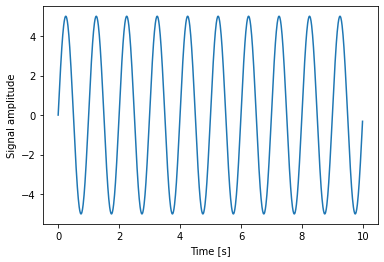

(-6.797966503956368e-15-3.535789881292208e-14j) (-6.797966503956368e-15+3.535789881292208e-14j)


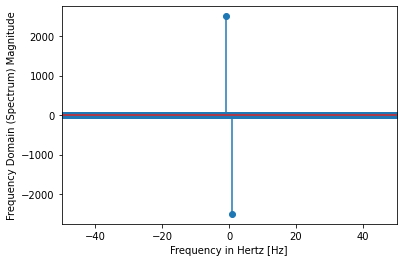

DEFINE FREQ SPECTRUM


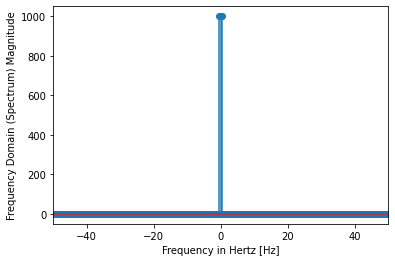

/home/lena/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


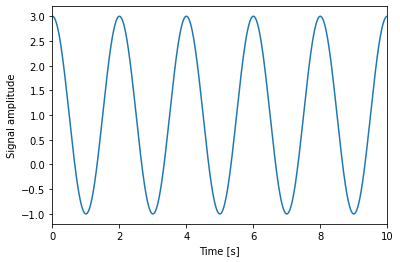

In [186]:
f = 1  # Frequency, in cycles per second, or Hertz
dur = 10.
amp = 5.
dt = 0.01
f_s = int(1./dt)  # Sampling rate, or number of measurements per second


t = np.arange(0, dur, dt)
x = amp * np.sin(f * 2. * np.pi * t)

fig, ax = plt.subplots()
ax.plot(t, x)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');
plt.show()

from scipy import fftpack

X = fftpack.fft(x)
freqs = fftpack.fftfreq(len(x)) * f_s

fig, ax = plt.subplots()

ax.stem(freqs, X.imag)
print(X[20], X[-20])
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)
plt.show()

print("DEFINE FREQ SPECTRUM")
freq_spec = np.zeros((X.shape)).astype(complex)
freq_spec[np.where(freqs==0.5)] = complex(1,0) * int(dur/dt)
freq_spec[np.where(freqs==-0.5)] = complex(1,0) * int(dur/dt)
freq_spec[np.where(freqs==0.)] = complex(1,0) * int(dur/dt)

fig, ax = plt.subplots()
ax.stem(freqs, np.abs(freq_spec))
ax.set_xlabel('Frequency in Hertz [Hz]')
ax.set_ylabel('Frequency Domain (Spectrum) Magnitude')
ax.set_xlim(-f_s / 2, f_s / 2)
#ax.set_ylim(-5, 110)
plt.show()

x_back = fftpack.ifft(freq_spec)
fig, ax = plt.subplots()

ax.plot(t, x_back)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');
ax.set_xlim(0, dur)
#ax.set_ylim(-5, 110)
plt.show()

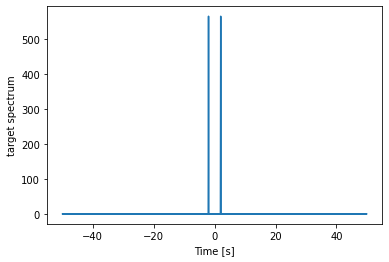

/home/lena/.local/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1333: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


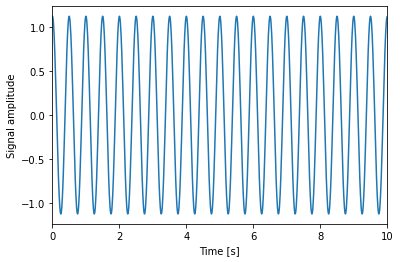

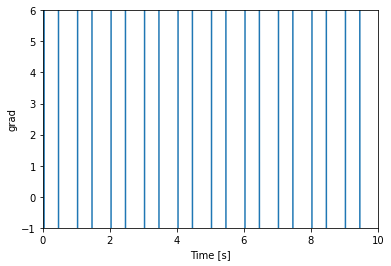

In [232]:
f_target = 2.
ds = 0.1
width = 0.001

f_target_array = fTarget(f_target, width, dur, dt)

fig, ax = plt.subplots()
ax.plot(freqs, f_target_array)
ax.set_xlabel('Time [s]')
ax.set_ylabel('target spectrum')
plt.show()

x_back = fftpack.ifft(f_target_array)
fig, ax = plt.subplots()
ax.plot(t, x_back)
ax.set_xlabel('Time [s]')
ax.set_ylabel('Signal amplitude');
ax.set_xlim(0, dur)
plt.show()

grad = F_freq_grad(x, f_target, width, dt, ds)



fig, ax = plt.subplots()
ax.plot(t, grad)
ax.set_xlabel('Time [s]')
ax.set_ylabel('grad');
ax.set_xlim(0, dur)
ax.set_ylim(-1,6)
plt.show()